In [1]:
import os 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",30)

In [2]:
df = pd.read_excel('telecom.xlsx')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

Data set info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Check the duplicates

In [6]:
df.duplicated().sum()

0

Check the missing values

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

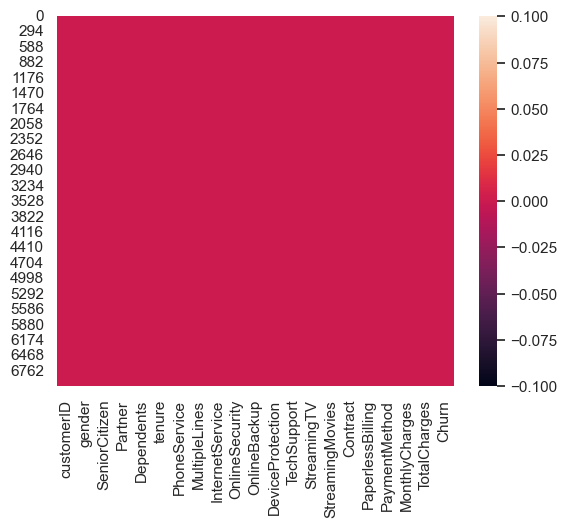

In [8]:
sns.heatmap(df.isnull())
plt.show

Understanding data set variables

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

check the describe

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


Check the datatypes

In [12]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
df.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

converting the TotalCharges data type into numerical

In [14]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)
df.TotalCharges =pd.to_numeric(df.TotalCharges)

In [15]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [16]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
df.isnull().sum()/len(df)*100

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

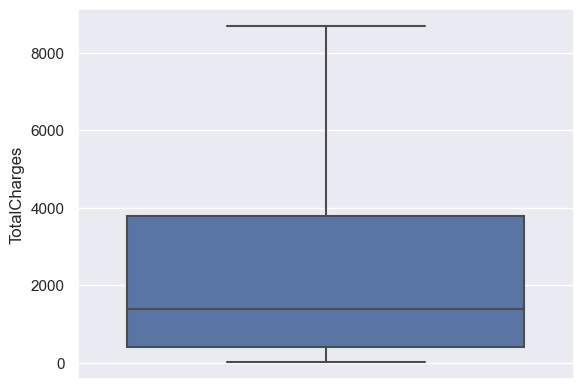

In [20]:
sns.boxplot(y='TotalCharges', data=df)
plt.show()

In [21]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Check the unique values for each variables

In [25]:
for i in df.columns:
    print("No of unique values in ", i ,"is", df[i].nunique())

No of unique values in  customerID is 7043
No of unique values in  gender is 2
No of unique values in  SeniorCitizen is 2
No of unique values in  Partner is 2
No of unique values in  Dependents is 2
No of unique values in  tenure is 73
No of unique values in  PhoneService is 2
No of unique values in  MultipleLines is 3
No of unique values in  InternetService is 3
No of unique values in  OnlineSecurity is 3
No of unique values in  OnlineBackup is 3
No of unique values in  DeviceProtection is 3
No of unique values in  TechSupport is 3
No of unique values in  StreamingTV is 3
No of unique values in  StreamingMovies is 3
No of unique values in  Contract is 3
No of unique values in  PaperlessBilling is 2
No of unique values in  PaymentMethod is 4
No of unique values in  MonthlyCharges is 1585
No of unique values in  TotalCharges is 6531
No of unique values in  Churn is 2


 data Wrangling

In [26]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
print("No. of customer churning :", df[df['Churn']=='Yes'].Churn.count())
churn_df = df[df['Churn']=='Yes']
print("No of unique MultipleLines :", df['MultipleLines'].nunique())
print("No of customer with InternetService :", df[df['InternetService']=='DSL']['InternetService'].count())

print("No. of customer with PhoneService :", df[df['PhoneService']=='Yes']['PhoneService'].count())
churn_df

No. of customer churning : 1869
No of unique MultipleLines : 3
No of customer with InternetService : 2421
No. of customer with PhoneService : 6361


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


 % of total customer churn

In [28]:
print("total no of churn :",df.Churn.count())
perc_churn =(len(churn_df)/len(df))*100
print(f"percentage of customer churning :{round(perc_churn, 2)}%")

total no of churn : 7043
percentage of customer churning :26.54%


In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
df['SeniorCitizen'].value_counts()*100.0/len(df)

0    83.785319
1    16.214681
Name: SeniorCitizen, dtype: float64

In [31]:
df['Partner'].value_counts()*100.0/len(df)

No     51.69672
Yes    48.30328
Name: Partner, dtype: float64

In [32]:
df['Dependents'].value_counts()*100.0/len(df)

No     70.041176
Yes    29.958824
Name: Dependents, dtype: float64

In [33]:
df['Churn'].value_counts()*100.0/len(df)

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [34]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [35]:
df['Churn']=np.where(df['Churn']=='Yes',1,0)

Feture Engineering Method along with Model Building

In [36]:
x = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [37]:
x.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50


In [38]:
x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [39]:
x = pd.get_dummies(x, columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
                               'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
                               'PaperlessBilling','PaymentMethod'], drop_first=True)

In [40]:
x.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [41]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [42]:
x.shape

(7043, 30)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_x = ['tenure','MonthlyCharges','TotalCharges']
x[scaler_x] = scaler.fit_transform(x[scaler_x])

In [44]:
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994971,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0.066327,-0.259629,-0.173876,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,-1.236724,-0.362660,-0.960399,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0.514251,-0.746535,-0.195400,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,-1.236724,0.197365,-0.941193,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.340876,0.665992,-0.129281,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7039,0,1.613701,1.277533,2.242808,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7040,0,-0.870241,-1.168632,-0.855182,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7041,1,-1.155283,0.320338,-0.872777,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


### Feature Engineering along with model Building

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_lable = RandomForestClassifier()
rf_lable.fit(x, y)
df1 = pd.DataFrame({"Feature": x.columns, "RF_importance": rf_lable.feature_importances_}).sort_values(by='RF_importance', ascending=False)
df1

,Feature,RF_importance
3,TotalCharges,0.201313
1,tenure,0.169728
2,MonthlyCharges,0.169169
10,InternetService_Fiber optic,0.036763
28,PaymentMethod_Electronic check,0.036613
25,Contract_Two year,0.029520
4,gender_Male,0.028701
19,TechSupport_Yes,0.025687
26,PaperlessBilling_Yes,0.025556
13,OnlineSecurity_Yes,0.025028


Feature Engineering along with Model Building

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
GB_lable = GradientBoostingClassifier()
GB_lable.fit(x, y)
df2 = pd.DataFrame({"Feature": x.columns, "GB_importance": GB_lable.feature_importances_}).sort_values(by='GB_importance', ascending=False)
df2

,Feature,GB_importance
1,tenure,0.305450
10,InternetService_Fiber optic,0.196804
28,PaymentMethod_Electronic check,0.104931
25,Contract_Two year,0.080170
3,TotalCharges,0.067614
2,MonthlyCharges,0.064679
24,Contract_One year,0.059717
26,PaperlessBilling_Yes,0.019566
13,OnlineSecurity_Yes,0.017252
19,TechSupport_Yes,0.013227


In [47]:
# Feature Engineering method along with model building
from sklearn.tree import DecisionTreeClassifier
dt_lable = DecisionTreeClassifier()
dt_lable.fit(x, y)
df3 = pd.DataFrame({"Feature": x.columns, "dt_importance": dt_lable.feature_importances_}).sort_values(by='dt_importance', ascending=False)
df3

,Feature,dt_importance
3,TotalCharges,0.213338
1,tenure,0.211501
2,MonthlyCharges,0.178200
10,InternetService_Fiber optic,0.108313
4,gender_Male,0.025411
28,PaymentMethod_Electronic check,0.024805
5,Partner_Yes,0.021753
0,SeniorCitizen,0.021356
17,DeviceProtection_Yes,0.016943
6,Dependents_Yes,0.016487


In [48]:
x = x.drop(['DeviceProtection_No internet service'], axis=1)

In [49]:
x.head(1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994971,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0


### Imbalanced Treatment

In [50]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote , y_smote = smote.fit_resample(x,y)
print("Original value count:", y.value_counts())
print("***********************SMOTE Method*****************")
print("After SMOTE value count:", y_smote.value_counts())

Original value count: 0    5174
1    1869
Name: Churn, dtype: int64
***********************SMOTE Method*****************
After SMOTE value count: 0    5174
1    5174
Name: Churn, dtype: int64


### Split the data into train and test

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size =0.25 ,random_state =101, stratify = y_smote)

### RandomForest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

In [53]:
#Evaluation metrics

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print("************Classification Report****************")
print(classification_report( y_train,y_pred_train))
print("*************************************************")
print(classification_report( y_test,y_pred_test))
print("************accuracy_score****************")
print(accuracy_score( y_train,y_pred_train))
print("*************************************************")
print(accuracy_score( y_test,y_pred_test))

************Classification Report****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3881
           1       1.00      1.00      1.00      3880

    accuracy                           1.00      7761
   macro avg       1.00      1.00      1.00      7761
weighted avg       1.00      1.00      1.00      7761

*************************************************
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1293
           1       0.82      0.86      0.84      1294

    accuracy                           0.84      2587
   macro avg       0.84      0.84      0.84      2587
weighted avg       0.84      0.84      0.84      2587

************accuracy_score****************
0.9987115062491947
*************************************************
0.836876691148048


### XG_Boost Classifier 

In [54]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

# Evaluation matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("*************classification_report*************")
print(classification_report(y_train, y_pred_train_xgb))
print("**************************")
print(classification_report(y_test, y_pred_test_xgb))

print("*************accuracy_score*************")
print(accuracy_score(y_train, y_pred_train_xgb))
print("**************************")
print(accuracy_score(y_test, y_pred_test_xgb))

*************classification_report*************
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      3881
           1       0.93      0.97      0.95      3880

    accuracy                           0.95      7761
   macro avg       0.95      0.95      0.95      7761
weighted avg       0.95      0.95      0.95      7761

**************************
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1293
           1       0.80      0.84      0.82      1294

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587

*************accuracy_score*************
0.9473006055920629
**************************
0.8167761886354851


### CrossValidation Method

In [55]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(xgb, x_train, y_train, cv=10)
print(training_accuracy.mean())
print("**************************")
print(training_accuracy.max())

0.8308197004073292
**************************
0.8556701030927835


### Deep Learning Method - Multilayer Perceptron Method

In [56]:
x_train.shape

(7761, 29)

In [57]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras import Sequential

In [58]:
model = Sequential()
model.add(Dense(32, input_shape=(29,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32 , epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7111 - loss: 0.5703 - val_accuracy: 0.7750 - val_loss: 0.4670
Epoch 2/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7899 - loss: 0.4465 - val_accuracy: 0.7889 - val_loss: 0.4560
Epoch 3/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7921 - loss: 0.4481 - val_accuracy: 0.7878 - val_loss: 0.4510
Epoch 4/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7996 - loss: 0.4296 - val_accuracy: 0.7920 - val_loss: 0.4516
Epoch 5/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7917 - loss: 0.4387 - val_accuracy: 0.7878 - val_loss: 0.4504
Epoch 6/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7983 - loss: 0.4283 - val_accuracy: 0.7874 - val_loss: 0.4448
Epoch 7/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7953 - loss: 0.4356 - val_accuracy: 0.7928 - val_loss: 0.4460
Epoch 8/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7948 - loss: 0.4280 - val_accu

243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8498 - loss: 0.3371 - val_accuracy: 0.8079 - val_loss: 0.4326
Epoch 52/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8454 - loss: 0.3401 - val_accuracy: 0.8110 - val_loss: 0.4350
Epoch 53/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8605 - loss: 0.3278 - val_accuracy: 0.8094 - val_loss: 0.4308
Epoch 54/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8534 - loss: 0.3380 - val_accuracy: 0.8090 - val_loss: 0.4339
Epoch 55/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8463 - loss: 0.3451 - val_accuracy: 0.8060 - val_loss: 0.4407
Epoch 56/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8561 - loss: 0.3398 - val_accuracy: 0.8071 - val_loss: 0.4353
Epoch 57/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8407 - loss: 0.3498 - val_accuracy: 0.8063 - val_loss: 0.4354
Epoch 58/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8525 - loss: 0.3352 - val_accuracy:

In [59]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [60]:
!pip install h2o

Defaulting to user installation because normal site-packages is not writeable


In [61]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 19.0.1+10-21, mixed mode, sharing)
  Starting server from C:\Users\cholk\AppData\Roaming\Python\Python311\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\cholk\AppData\Local\Temp\tmpqxqwifc1
  JVM stdout: C:\Users\cholk\AppData\Local\Temp\tmpqxqwifc1\h2o_cholk_started_from_python.out
  JVM stderr: C:\Users\cholk\AppData\Local\Temp\tmpqxqwifc1\h2o_cholk_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.3
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_cholk_z4v1xi
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [69]:
# Loading the dataset
dataset = h2o.import_file("Telecom.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [70]:
dataset.head()

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [73]:
df_train, df_test = dataset.split_frame(ratios=[.8])

In [74]:
df_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No


In [76]:
df_test

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
4183-MYFRB,Female,0,No,No,21,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,90.05,1862.9,No
8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.8,202.25,No
6467-CHFZW,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes
8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.2,30.2,Yes
6047-YHPVI,Male,0,No,No,5,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.7,316.9,Yes
6572-ADKRS,Female,0,No,No,46,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),74.8,3548.3,No
7639-LIAYI,Male,0,No,No,52,Yes,Yes,DSL,Yes,No,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),79.75,4217.8,No


In [78]:
y = 'Churn' # dependent variable
x = dataset.columns
x.remove(y)
x.remove('customerID')

In [79]:
x

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [80]:
y

'Churn'

### Building H2O AutoML Model

In [84]:
aml = H2OAutoML(max_runtime_secs=300, max_models=10, seed=10, verbosity='info', nfolds=2)

In [85]:
aml.train(x=x,y=y, training_frame=df_train)

AutoML progress: |
22:58:31.189: Project: AutoML_1_20240626_225831
22:58:31.190: Setting stopping tolerance adaptively based on the training frame: 0.01332267944962386
22:58:31.190: Build control seed: 10
22:58:31.191: training frame: Frame key: AutoML_1_20240626_225831_training_py_6_sid_ae9e    cols: 21    rows: 5634  chunks: 64    size: 816514  checksum: 9190666666853213716
22:58:31.191: validation frame: NULL
22:58:31.191: leaderboard frame: NULL
22:58:31.191: blending frame: NULL
22:58:31.191: response column: Churn
22:58:31.191: fold column: null
22:58:31.191: weights column: null
22:58:31.203: AutoML: XGBoost is not available; skipping it.
22:58:31.208: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)

key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/5
# GBM base models (used / total),1/1
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),2/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


In [86]:
lb = aml.leaderboard
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20240626_225831,0.846017,0.416512,0.650814,0.228981,0.368004,0.135427
StackedEnsemble_AllModels_1_AutoML_1_20240626_225831,0.845559,0.416574,0.653735,0.231538,0.368268,0.135621
GBM_grid_1_AutoML_1_20240626_225831_model_1,0.845403,0.417506,0.656115,0.232959,0.3684,0.135718
GLM_1_AutoML_1_20240626_225831,0.843915,0.419379,0.643915,0.22986,0.369208,0.136315
GBM_1_AutoML_1_20240626_225831,0.843169,0.419492,0.652064,0.242587,0.369626,0.136623
DeepLearning_1_AutoML_1_20240626_225831,0.838615,0.430963,0.639148,0.246396,0.374348,0.140136
GBM_5_AutoML_1_20240626_225831,0.835239,0.429088,0.635727,0.244668,0.374566,0.1403
GBM_2_AutoML_1_20240626_225831,0.833654,0.431536,0.632136,0.24547,0.375569,0.141052
GBM_3_AutoML_1_20240626_225831,0.831631,0.434117,0.629505,0.244512,0.376103,0.141453
XRT_1_AutoML_1_20240626_225831,0.830449,0.434195,0.625416,0.249446,0.376122,0.141468


In [90]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

C:\Users\cholk\AppData\Roaming\Python\Python311\site-packages\h2o\frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [91]:
model_ids

['StackedEnsemble_BestOfFamily_1_AutoML_1_20240626_225831',
 'StackedEnsemble_AllModels_1_AutoML_1_20240626_225831',
 'GBM_grid_1_AutoML_1_20240626_225831_model_1',
 'GLM_1_AutoML_1_20240626_225831',
 'GBM_1_AutoML_1_20240626_225831',
 'DeepLearning_1_AutoML_1_20240626_225831',
 'GBM_5_AutoML_1_20240626_225831',
 'GBM_2_AutoML_1_20240626_225831',
 'GBM_3_AutoML_1_20240626_225831',
 'XRT_1_AutoML_1_20240626_225831',
 'GBM_4_AutoML_1_20240626_225831',
 'DRF_1_AutoML_1_20240626_225831']

In [92]:
aml.leader.model_performance(df_test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.13043843488489312
RMSE: 0.36116261556934864
LogLoss: 0.40578173319970845
AUC: 0.8540142276422764
AUCPR: 0.6793808898846798
Gini: 0.7080284552845528
Null degrees of freedom: 1408
Residual degrees of freedom: 1403
Null deviance: 1620.5500193181372
Residual deviance: 1143.4929241567784
AIC: 1155.4929241567784

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29224646481283795
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     776   264    0.2538   (264.0/1040.0)
Yes    71    298    0.1924   (71.0/369.0)
Total  847   562    0.2378   (335.0/1409.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.292246     0.640172  220
max f2                       0.191658     0.753518  272
max f0point5                 0.516242     0.666053  129
max accuracy                 0.516242     0.822569  129
max precision                0.903772     1         0
max recall                   0.00821102   1         396
max specificity              0.903772     1         0
max absolute_mcc             0.516242     0.521143  129
max min_per_class_accuracy   0.316063     0.768269  207
max mean_per_class_accuracy  0.260898     0.780763  235
max tns                      0.903772     1040      0
max fns                      0.903772     368       0
max fps                      0.00505161   1040      399
max tps                      0.00821102   369       396
max tnr                      0.903772     1         0
max fnr                      0.903772     0.99729   0
max fpr                      0.00505161   1         399
max tpr                      0.00821102   1         396

Gains/Lift Table: Avg response rate: 26.19 %, avg score: 27.69 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0106458                   0.833703           3.3093     3.3093             0.866667         0.852058   0.866667                    0.852058            0.0352304       0.0352304                  230.93    230.93             0.0333073
2        0.020582                    0.807659           3.81843    3.55509            1                0.81998    0.931034                    0.836572            0.0379404       0.0731707                  281.843   255.509            0.0712477
3        0.0305181                   0.784307           3.00019    3.37442            0.785714         0.791978   0.883721                    0.822053            0.0298103       0.102981                   200.019   237.442            0.0981733
4        0.0404542                   0.769155           3.00019    3.28251            0.785714         0.774542   0.859649                    0.810384            0.0298103       0.132791                   200.019   228.251            0.125099
5        0.0503903                   0.7531             3.00019    3.22684            0.785714         0.7615     0.84507                     0.800745            0.0298103       0.162602                   200.019   222.684            0.152025
6        0.100071                    0.66899            2.782      3.006              0.728571         0.708288   0.787234                    0.754844            0.138211        0.300813                   178.2     200.6              0.271967
7        0.150461                    0.599361           2.52769    2.84581            0.661972         0.633216   0.745283

In [94]:
h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/5
# GBM base models (used / total),1/1
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),2/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


In [95]:
output =h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])
output

key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/5
# GBM base models (used / total),1/1
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),2/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


In [96]:
aml.leader

key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/5
# GBM base models (used / total),1/1
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),2/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


In [97]:
y_pred = aml.leader.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [98]:
y_pred

predict,No,Yes
No,0.966545,0.0334546
No,0.974365,0.0256348
Yes,0.494967,0.505033
Yes,0.233692,0.766308
No,0.931968,0.0680325
Yes,0.502417,0.497583
Yes,0.501268,0.498732
Yes,0.321414,0.678586
No,0.729458,0.270542
No,0.962676,0.0373244
